# Isospectral Matrix Reduction

Author : Seong Cho

We first perform Isospectral Reduction along row 1 for our matrix $M$

$$
M =
\begin{bmatrix}
1 & 0 & 1 & -1\\
2 & 1 & -1 & 1\\
1 & 0 & 0 & 2\\
1 & 1 & 1 & 1\\
\end{bmatrix}
$$

Since our matrix is a $4\times4$ square matrix, our $S \subset \{1,2,3,4\}$, and reducing along row 1 would mean that $S$ contains everything but 1, hence $S = \{2,3,4\}$.
Then, denoting $\overline{S}$ as the set complement of $S$, we have $\overline{S} = \{1\}$.

We then obtain the following four submatrices, if $M_{RC}$ is the submatrix of $M$ with rows indexed by $R$ and columns indexed by $C$.

$$
M_{SS} = 
\begin{bmatrix}
1 & -1 & 1\\
0 & 0 & 2\\
1 & 1 & 1\\
\end{bmatrix}
\quad
M_{\overline{S}S} = 
\begin{bmatrix}
0 & 1 & -1
\end{bmatrix}
\quad
M_{S\overline{S}} = 
\begin{bmatrix}
2\\
1\\
1\\
\end{bmatrix}
\quad
M_{\overline{SS}} = 
\begin{bmatrix}
1
\end{bmatrix}
$$

The formula for Isospectral row reduction is:

$$
\mathcal{R}_{S}(M) = M_{SS} - M_{S\overline{S}}(M_{\overline{SS}} - \lambda I)^{-1}M_{\overline{S}S}
$$

Using this formula, we obain

$$
\mathcal{R}_{S}(M) =
\begin{bmatrix}
1 & -1 - \frac{2}{1 - \lambda} & 1 + \frac{2}{1 - \lambda}\\
0 & \frac{-1}{1 - \lambda} & 2 + \frac{1}{1 - \lambda}\\
1 & 1 - \frac{1}{1 - \lambda} & 1 + \frac{1}{1 - \lambda}\\
\end{bmatrix}
$$

We can verify that the spectrum of our original matrix $M$ corresponds with that of our reduced matrix $\mathcal{R}_{S}(M)$ below.

In [78]:
M = np.array([[1,0,1,-1],[2,1,-1,1],[1,0,0,2],[1,1,1,1]])
eigs = la.eigvals(M)
eigs

array([ 2.00000000+0.j        ,  1.32948354+0.80225456j,
        1.32948354-0.80225456j, -1.65896708+0.j        ])

In [99]:
x = sy.symbols('x')
S = sy.Matrix(M)
R = S[1:,1:] - ((1/(1-x))*S[1:,0]@S[0,1:])
R

Matrix([
[1.0, -1.0 - 2.0/(-x + 1), 1.0 + 2.0/(-x + 1)],
[  0,       -1.0/(-x + 1), 2.0 + 1.0/(-x + 1)],
[1.0,  1.0 - 1.0/(-x + 1), 1.0 + 1.0/(-x + 1)]])

In [22]:
char_poly = (R - x*sy.eye(3)).det()
sy.solve(char_poly, x)

[-1.65896708191699,
 2.00000000000000,
 1.3294835409585 - 0.802254557557411*I,
 1.3294835409585 + 0.802254557557411*I]

# Gershgorin's Theorem

Gershgorin's Theorem tells us that if we have a square matrix $M$, its eigenvalues are contained in the region described by 

$$
\Gamma(M) = \bigcup_{i=1}^n \{\lambda \in \mathbb{C} : |\lambda - M_{ii}| \leq \sum_{j=1, j\neq i}^n |M_{ij}|\}
$$

Solving these regions for $M$, we obtain

$$
\Gamma(M) = \{|\lambda - 1| \leq 2\} \cup \{|\lambda - 1| \leq 4\} \cup \{|\lambda| \leq 3\} \cup \{|\lambda - 1| \leq 3\}
$$

We plot this region using a simple scatter plot. 

In [24]:
import matplotlib.pyplot as plt
from pylab import *

In [70]:
domain = np.linspace(-5,5,200)
domain = np.array([r + 1j*np.linspace(-5,5,200) for r in domain]).flatten()

r1 = []
r2 = []
r3 = []
r4 = []
for c in domain:
    if np.abs(c-1) <= 2:
        r1.append(c)
    if np.abs(c-1) <= 4:
        r2.append(c)
    if np.abs(c) <= 3:
        r3.append(c)
    if np.abs(c - 1) <= 3:
        r4.append(c)

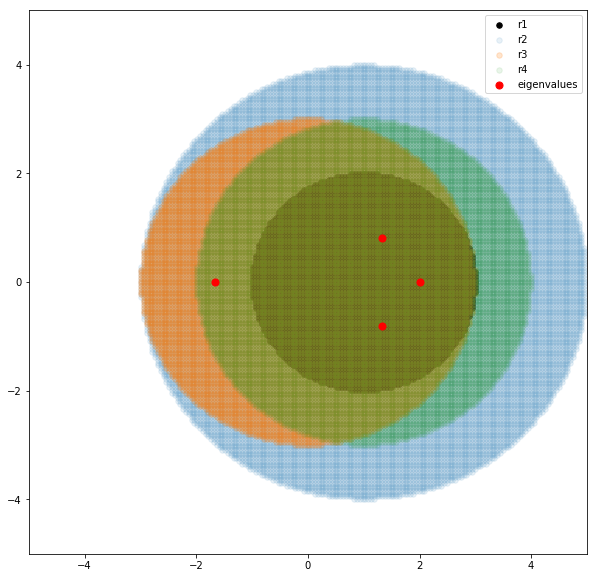

In [81]:
plt.figure(figsize=(10,10))
plt.scatter(np.real(r1), np.imag(r1), alpha=1, s=30, c='k', label='r1')
plt.scatter(np.real(r2), np.imag(r2), alpha=0.1, s=30, label='r2')
plt.scatter(np.real(r3), np.imag(r3), alpha=0.2, s=30, label='r3')
plt.scatter(np.real(r4), np.imag(r4), alpha=0.1, s=30, label='r4')
plt.scatter(np.real(eigs), np.imag(eigs), s=50, c='r', label='eigenvalues')

plt.legend()
plt.ylim((-5,5))
plt.xlim((-5,5))
plt.show()

We now solve the Gershgorin regions for R and we obtain

$$
\Gamma({\mathcal{R}_{S}(M)}) = \Big\{|\lambda - 1| \leq \Big|{-1 - \frac{2}{1 - \lambda}}\Big| + \Big|1 + \frac{2}{1 - \lambda}\Big|\Big\} \bigcup \Big\{\Big|\lambda + \frac{1}{1 - \lambda}\Big| \leq \Big|2 + \frac{1}{1 - \lambda}\Big| \Big\} \bigcup \Big\{\Big|\lambda + 1 + \frac{1}{1 - \lambda}\Big| \leq 1 + \Big|1 - \frac{1}{1 - \lambda}\Big|\Big\}
$$

In [73]:
g1 = []
g2 = []
g3 = []
for c in domain:
    if np.abs(c-1) <= np.abs(-1-2/(1-c)) + np.abs(1+2/(1-c)):
        g1.append(c)
    if np.abs(c + 1/(1-c)) <= np.abs(2 + 1/(1-c)):
        g2.append(c)
    if np.abs(c - (1 + 1/(1-c))) <= 1 + np.abs(1-1/(1-c)):
        g3.append(c)

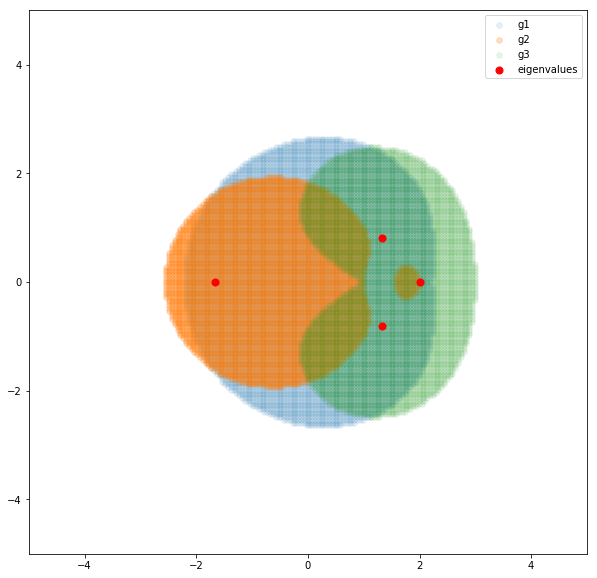

In [80]:
plt.figure(figsize=(10,10))
plt.scatter(np.real(g1), np.imag(g1), alpha=0.1, s=30, label='g1')
plt.scatter(np.real(g2), np.imag(g2), alpha=0.25, s=30, label='g2')
plt.scatter(np.real(g3), np.imag(g3), alpha=0.1, s=30, label='g3')
plt.scatter(np.real(eigs), np.imag(eigs), s=50, c='r', label='eigenvalues')
plt.legend()
plt.ylim((-5,5))
plt.xlim((-5,5))
plt.show()

Following the same procedure, we now reduce the matrix $M$ along the rows 1 and 3. ($S = \{2, 4\}$)

In [135]:
#Indexing for the correct matrices
s_1 = sy.Matrix(M[[1,3], [[1,1],[3,3]]].T) #M_S,S
s_2 = sy.Matrix(M[[0,2], [[1,1],[3,3]]].T) #M_Sbar,S
s_3 = sy.Matrix(M[[1,3], [[0,0],[2,2]]].T) #M_S,Sbar
s_4 = sy.Matrix(M[[0,2], [[0,0],[2,2]]].T) #M_Sbar,Sbar

We check to see that all our submatrices are correct

In [121]:
S

Matrix([
[1.0, 0.0,  1.0, -1.0],
[2.0, 1.0, -1.0,  1.0],
[1.0, 0.0,  0.0,  2.0],
[1.0, 1.0,  1.0,  1.0]])

In [136]:
s_1

Matrix([
[1.0, 1.0],
[1.0, 1.0]])

In [137]:
s_2

Matrix([
[0.0, -1.0],
[0.0,  2.0]])

In [138]:
s_3

Matrix([
[2.0, -1.0],
[1.0,  1.0]])

In [139]:
s_4

Matrix([
[1.0, 1.0],
[1.0, 0.0]])

Compute the isospectral reduction

In [144]:
R2 = s_1 - s_3@(s_4 - x*sy.eye(2)).inv()@s_2
R2

Matrix([
[1.0,  2.0*(x - 1.0)/(-x*(x - 1.0) + 1.0) + 1.0 + 5.0*(x - 1.0)/((-x + 1.0)*(-x*(x - 1.0) + 1.0)) + 2.0/(-x + 1.0) + 2.0*(x - 1.0)/((-x + 1.0)**2*(-x*(x - 1.0) + 1.0))],
[1.0, -2.0*(x - 1.0)/(-x*(x - 1.0) + 1.0) + 1.0 + 1.0*(x - 1.0)/((-x + 1.0)*(-x*(x - 1.0) + 1.0)) + 1.0/(-x + 1.0) + 1.0*(x - 1.0)/((-x + 1.0)**2*(-x*(x - 1.0) + 1.0))]])

Check to see that its spectrum corresponds to the original

In [146]:
char_poly2 = (R - x*sy.eye(2)).det()
sy.solve(char_poly2, x)

[-1.65896708191699,
 2.00000000000000,
 1.3294835409585 - 0.802254557557411*I,
 1.3294835409585 + 0.802254557557411*I]

We now compute the regions. Since $\mathcal{R}_S(M)$ is now only a $2\times2$ matrix, the regions are defined as

$$
\Gamma(\mathcal{R}_S(M)) = \{|\lambda - r_{11}| \leq |r_{12}|\} \cup \{|\lambda - r_{22}| \leq |r_{12}|\}
$$

Since $r_{11} = r_{21} = 1$, we obtain

$$
\Gamma(\mathcal{R}_S(M)) = \{|\lambda - 1| \leq |r_{12}|\} \cup \{|\lambda - r_{22}| \leq 1\}
$$

We define $|r_{12}|$ and $|\lambda - r_{22}|$ as callable functions.

In [153]:
f1 = sy.lambdify(x, R2[1])
f2 = sy.lambdify(x, x-R2[3])

In [154]:
gg1 = []
gg2 = []
for c in domain:
    if np.abs(c - 1) <= np.abs(f1(c)):
        gg1.append(c)
    if np.abs(f2(c)) <= 1:
        gg2.append(c)

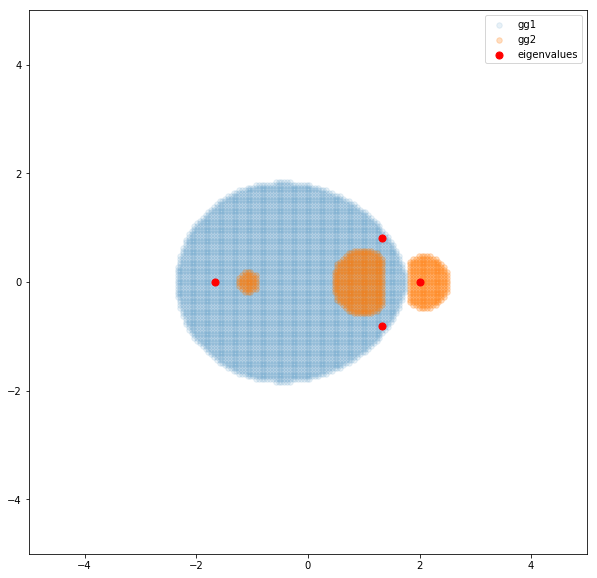

In [155]:
plt.figure(figsize=(10,10))
plt.scatter(np.real(gg1), np.imag(gg1), alpha=0.1, s=30, label='gg1')
plt.scatter(np.real(gg2), np.imag(gg2), alpha=0.25, s=30, label='gg2')
plt.scatter(np.real(eigs), np.imag(eigs), s=50, c='r', label='eigenvalues')
plt.legend()
plt.ylim((-5,5))
plt.xlim((-5,5))
plt.show()